<a href="https://colab.research.google.com/github/fernandofsilva/Keras/blob/main/Sequential_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb

In [3]:
# Download and assign the data set using load_data()
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [4]:
# Inspect the type of the data
type(x_train)

numpy.ndarray

In [5]:
# Display the first dataset element input
# Notice encoding
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [6]:
# Display the first dataset element output
y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults
imdb.load_data(path='imdb.npz', index_from=3)
# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=1000)

In [ ]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10, num_words=1000, oov_char=2)

In [ ]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(maxlen=500)

In [ ]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)

#### Explore the dataset word index

In [7]:
# Load the imdb word index using get_word_index()
imbd_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
# View the word index as a dictionary,
# accounting for index_from.
index_from = 3
imbd_word_index = {key:value + index_from for key, value in imbd_word_index.items()}

In [9]:
# Retrieve a specific word's index
imbd_word_index['simpsonian']

52256

In [10]:
# View an input sentence
inv_imdb_word_index = {value: key for key, value in imbd_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [11]:
# Get the sentiment value
y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [12]:
# Load the imdb data set
import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [13]:
# Inspect the input data shape
x_train.shape

(25000,)

In [14]:
# Pad the inputs to the maximum length using maxlen
padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(
    x_train,
    maxlen=300,
    padding='post',
    truncating='pre'
)

In [15]:
# Inspect the output data shape
padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [16]:
# Import numpy 
import numpy as np

In [17]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims
padded_x_train = np.expand_dims(padded_x_train, -1)

In [18]:
# Create a Masking layer 
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [19]:
# Pass tf_x_train to it
masked_x_train = masking_layer(tf_x_train)

In [20]:
# Look at the dataset
tf_x_train[0]

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[1.0000e+00],
       [1.4000e+01],
       [2.2000e+01],
       [1.6000e+01],
       [4.3000e+01],
       [5.3000e+02],
       [9.7300e+02],
       [1.6220e+03],
       [1.3850e+03],
       [6.5000e+01],
       [4.5800e+02],
       [4.4680e+03],
       [6.6000e+01],
       [3.9410e+03],
       [4.0000e+00],
       [1.7300e+02],
       [3.6000e+01],
       [2.5600e+02],
       [5.0000e+00],
       [2.5000e+01],
       [1.0000e+02],
       [4.3000e+01],
       [8.3800e+02],
       [1.1200e+02],
       [5.0000e+01],
       [6.7000e+02],
       [2.2665e+04],
       [9.0000e+00],
       [3.5000e+01],
       [4.8000e+02],
       [2.8400e+02],
       [5.0000e+00],
       [1.5000e+02],
       [4.0000e+00],
       [1.7200e+02],
       [1.1200e+02],
       [1.6700e+02],
       [2.1631e+04],
       [3.3600e+02],
       [3.8500e+02],
       [3.9000e+01],
       [4.0000e+00],
       [1.7200e+02],
       [4.5360e+03],
       [1.1110e+03],
     

In [21]:
# Look at the ._keras_mask for the dataset
masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [22]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [23]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
sequence_of_indices = tf.constant([[0], [1], [5], [500]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(4, 1, 16), dtype=float32, numpy=
array([[[-0.03384013,  0.01961266, -0.00407616, -0.02676683,
         -0.04171107,  0.04573691, -0.03128108,  0.03045709,
          0.02093724,  0.01168049, -0.04953232,  0.01955343,
          0.01749145,  0.02610284,  0.01122564, -0.01842086]],

       [[-0.00837994, -0.04076691, -0.01800364,  0.02976372,
          0.02743229,  0.01433057, -0.04841885, -0.00104464,
         -0.00130754,  0.0265285 , -0.04371301, -0.02958431,
         -0.01076815,  0.02824445,  0.01549076,  0.04865367]],

       [[ 0.00732013,  0.00233767, -0.02226815, -0.00071578,
          0.03110348,  0.01098676,  0.03848842, -0.03042487,
          0.00692971, -0.03156032, -0.01555482, -0.00908362,
          0.0221822 ,  0.02040989, -0.0255141 ,  0.00458048]],

       [[ 0.04834571, -0.00355041,  0.02562382, -0.02553598,
         -0.01803446,  0.03568751,  0.042681  ,  0.01489751,
          0.03384409,  0.03119042,  0.03374496,  0.04954587,
          0.00524569,  0

In [24]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]

array([[-0.03384013,  0.01961266, -0.00407616, ...,  0.02610284,
         0.01122564, -0.01842086],
       [-0.00837994, -0.04076691, -0.01800364, ...,  0.02824445,
         0.01549076,  0.04865367],
       [-0.04674384,  0.03472451,  0.0479547 , ..., -0.04873643,
         0.02285046, -0.04293288],
       ...,
       [-0.02790815, -0.00367014,  0.00133723, ..., -0.03981848,
        -0.03666147, -0.01545569],
       [ 0.04025768,  0.02141223,  0.0192467 , ...,  0.02257197,
        -0.04311323,  0.03380258],
       [ 0.04834571, -0.00355041,  0.02562382, ...,  0.02360071,
        -0.04014398,  0.02150302]], dtype=float32)

In [25]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][14,:]

array([-0.04363369,  0.04605534,  0.04025488, -0.03316386, -0.00512024,
       -0.01290286,  0.02062912, -0.00940493, -0.04129497, -0.01632399,
        0.0361782 ,  0.03810607, -0.0487758 , -0.04995751,  0.01746707,
        0.02793877], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [26]:
# Create a layer that uses the mask_zero kwarg
masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [27]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(4, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [ True],
       [ True]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [28]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [29]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

In [30]:
# A function to get the dataset word index
def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [31]:
# Get the word index
imdb_word_index = get_imdb_word_index()

In [32]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value:key for key, value in imbd_word_index.items()}

In [35]:
# View the first dataset example sentence
[inv_imdb_word_index[index] for index in x_train[100] if index > 3]

['it',
 'kind',
 'and',
 'first',
 'father',
 'a',
 'cinematography',
 'chosen',
 'the',
 'his',
 'actor',
 'this',
 'performance',
 "don't",
 'film',
 'shows',
 'fight',
 'as',
 'falling',
 'episodes',
 "he's",
 'themselves',
 'heston',
 'kidnaps',
 'with',
 'who',
 'more',
 'it',
 'each',
 "it's",
 'just',
 'i',
 'it',
 'jim',
 'festivals',
 'in',
 'the',
 'the',
 'there',
 'to',
 'i',
 'about',
 'and',
 'lady',
 'a',
 'channel',
 'nice',
 'the',
 'absolutely',
 'related',
 'this',
 'you',
 'thinks',
 'the',
 'explosion',
 'hayworth',
 'the',
 'skills',
 'money',
 'it',
 'most',
 'show',
 'editing',
 'what',
 'movie',
 'money',
 'i',
 'to',
 'or',
 'and',
 'lady',
 'a',
 'wonder',
 'this',
 'that',
 'film',
 'hold',
 'despite',
 'early',
 'a',
 'cinematography',
 'chosen',
 'of',
 'way',
 'and',
 'going',
 'pleasantly',
 'them',
 'recommend',
 'were',
 'way',
 'in',
 'tale',
 'this',
 'it',
 'another',
 'direction',
 'just',
 'explosion',
 'bored',
 'same',
 'movie',
 'their',
 'of',

#### Build an Embedding layer into a model

In [36]:
# Get the maximum token value
max_index_value = max(imbd_word_index.values())

In [37]:
# Specify an embedding dimension
embedding_dim = 16

In [38]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [39]:
# Functional API refresher: use the Model to build the same model
review_sequence = tf.keras.Input((None, ))
embedding_sequece = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequece)
positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)

In [40]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          1417408   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,417,425
Trainable params: 1,417,425
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [41]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [42]:
# Train the model using .fit(), savng its history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 15s 19ms/step - loss: 0.6902 - accuracy: 0.5781 - val_loss: 0.6841 - val_accuracy: 0.7266
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.6713 - accuracy: 0.6938 - val_loss: 0.6538 - val_accuracy: 0.7063
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.6301 - accuracy: 0.7485 - val_loss: 0.6036 - val_accuracy: 0.7609
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.5795 - accuracy: 0.7892 - val_loss: 0.5549 - val_accuracy: 0.7859
Epoch 5/5
782/782 [==============================] - 15s 19ms/step - loss: 0.5309 - accuracy: 0.8149 - val_loss: 0.5116 - val_accuracy: 0.7969


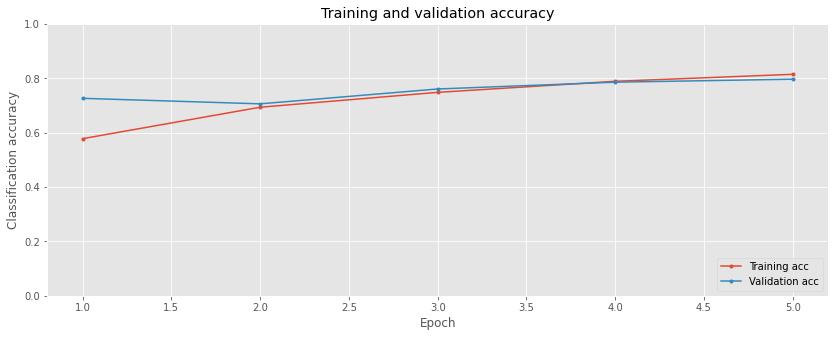

In [44]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [45]:
# Retrieve the embedding layer's weights from the trained model
weights = model.layers[1].get_weights()[0]

In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [47]:
# Create a SimpleRNN layer and test it
simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [48]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.0, 1.0], [2., 2.], [56., -100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-0.99217606, -0.99998635, -1.        ,  1.        , -1.        ,
        -0.99994177, -1.        , -0.99999887, -1.        , -1.        ,
         1.        , -1.        , -1.        ,  0.99999964, -1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [49]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [50]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [51]:
# A function to get the dataset word index
def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [52]:
# Get the word index using get_imdb_word_index()
imbd_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [53]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())

In [54]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [55]:
# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [56]:
# Fit the model and save its training history
model.fit(x_train, y_train, epochs=3, batch_size=3)

Epoch 1/3
5707/5707 [==============================] - 374s 66ms/step - loss: 0.4668 - accuracy: 0.7851
Epoch 2/3
5707/5707 [==============================] - 381s 67ms/step - loss: 0.3105 - accuracy: 0.8764
Epoch 3/3
5707/5707 [==============================] - 369s 65ms/step - loss: 0.2129 - accuracy: 0.9190


#### Plot learning curves

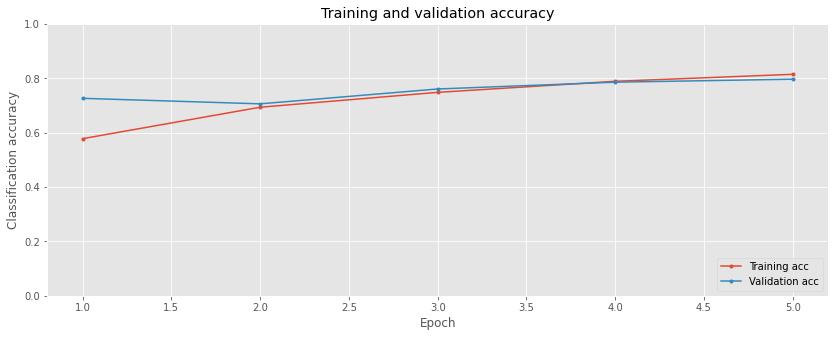

In [57]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [58]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [59]:
# Get the model prediction using model.predict()
model.predict(x_test[None, 0, :]) 

array([[0.1311594]], dtype=float32)

In [60]:
# Get the corresponding label
y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [61]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [62]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [63]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [64]:
# Get the word index using get_imdb_word_index()
imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [65]:
# Get the maximum index value and specify an embedding dimension
max_index_value = max(imbd_word_index.values())
embedding_dim = 16

In [68]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [70]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=8),
        merge_mode='sum',
        backward_layer=tf.keras.layers.LSTM(units=8, go_backwards=True)
        ),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

In [72]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

#### Compile and fit the model

In [73]:
# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [74]:
# Train the model, saving its history
model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 145s 271ms/step - loss: 0.4255 - accuracy: 0.7955
Epoch 2/3
536/536 [==============================] - 142s 265ms/step - loss: 0.2211 - accuracy: 0.9200
Epoch 3/3
536/536 [==============================] - 139s 259ms/step - loss: 0.1443 - accuracy: 0.9516


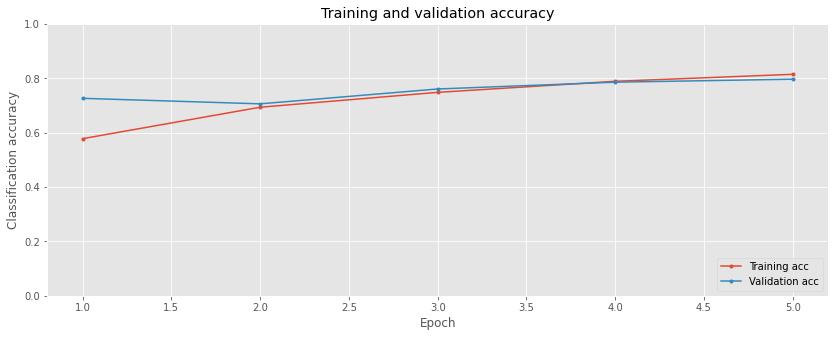

In [75]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);